In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Deep Learning/統計的機械学習　演習/machine learning/'

Mounted at /content/drive


In [19]:
# Change directory and then list files
%cd /content/drive/My Drive/Deep Learning/統計的機械学習　演習/machine learning/

/content/drive/My Drive/Deep Learning/統計的機械学習　演習/machine learning
Linear_model.ipynb  tensor_flow.ipynb


In [21]:
observations = 1000
xs = np.random.uniform(-10,10,size=(observations,1))
zs = np.random.uniform(-10,10,size=(observations,1))
generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,size=(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)
%ls

Linear_model.ipynb  tensor_flow.ipynb  TF_intro.npz


In [23]:
training_data = np.load('TF_intro.npz')

In [39]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                          )
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer =custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose=2)


Epoch 1/100
32/32 - 0s - loss: 26.8241 - 327ms/epoch - 10ms/step
Epoch 2/100
32/32 - 0s - loss: 1.3317 - 44ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4639 - 45ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.3992 - 42ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4034 - 43ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3631 - 48ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.4266 - 51ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3799 - 47ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3825 - 46ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.4169 - 40ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3892 - 41ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3903 - 40ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3809 - 40ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.4084 - 65ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3747 - 71ms/epoch - 2ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3526 - 49ms/epoch - 2ms/ste

In [31]:
model.layers[0].get_weights()

[array([[ 2.003724 ],
        [-2.9951644]], dtype=float32),
 array([4.969067], dtype=float32)]

In [32]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

In [38]:
#model.predict_on_batch(training_data['inputs']).round(1)

In [37]:
#training_data['targets'].round(1)

<function matplotlib.pyplot.show(close=None, block=None)>

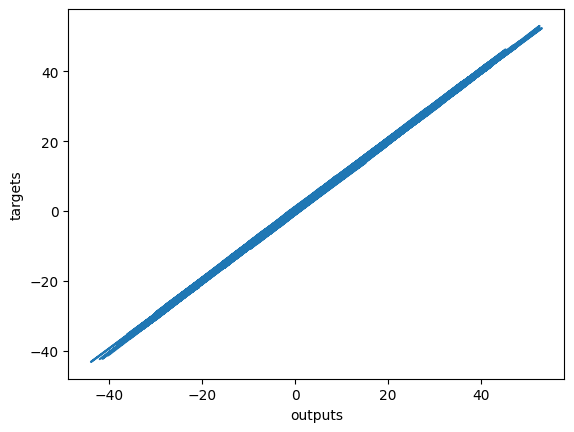

In [40]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show